<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* customer analysis 
* iteration

In [4]:
import pandas as pd 
import numpy as np
import os 
from datetime import datetime, date, time, timezone, timedelta
import plotnine as gg 
from plotnine import ggplot, aes 
import re

from functools import reduce
from collections import ChainMap,defaultdict,Counter

# customer analysis

In [2]:
os.listdir()

['.config',
 'rfm_test.csv',
 'retail_data_transactions.csv',
 'item_categories.csv',
 'listings.csv',
 'shops.csv',
 'ecommerce-data.csv',
 'items.csv',
 'sample_submission.csv',
 '.Rhistory',
 'online_retail_II.xlsx',
 'sales_train.csv',
 'test.csv',
 'retail_data_response.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [3]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
['_'.join(re.split('(?=[A-Z])', a[0].lower()+a[1:])).lower() for a in df.columns]

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_i_d',
 'country']

In [11]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df = df[(~df.invoiceno.astype(str).str.contains('C'))&(df.country == 'United Kingdom')]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['date'] = df['invoicedate'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['quantity'] * df['unitprice']
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [16]:
df = df[['customerid', 'date', 'month', 'rev']].rename(columns = {'customerid':'id'})
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [28]:
list_pu = df.groupby(['id', 'month'])['rev'].sum().reset_index().sort_values(['id', 'month'], ascending = [1,1])
list_npu = list_pu.groupby('id').first().reset_index()
list_mon = list_npu['month'].sort_values().unique()

In [31]:
for mon in list_mon : 

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp = temp.assign(npu_month = mon,
                     num = temp['month'].rank(),
                     ratio = lambda x : round(x['pu']/x['pu'].max()*100,2))
  temp = temp.reindex(columns = ['npu_month', 'num', 'pu','ratio'])

  if mon == list_mon[0] :
    res = temp
  else :
    res = pd.concat([res, temp], axis = 0)

res['npu_month'] = res['npu_month'].astype(str)
res.head()

,npu_month,num,pu,ratio
0,2010-12-01,1.0,815,100.00
1,2010-12-01,2.0,289,35.46
2,2010-12-01,3.0,263,32.27
3,2010-12-01,4.0,304,37.30
4,2010-12-01,5.0,293,35.95


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


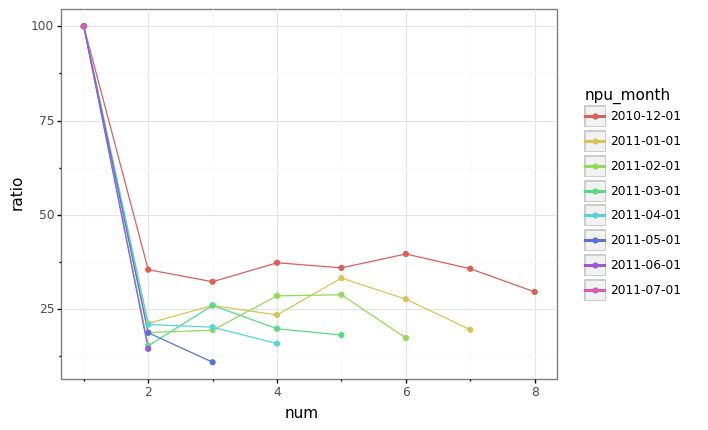

<ggplot: (8748790639193)>

In [32]:
(
    ggplot(res, aes('num', 'ratio', color = 'npu_month')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

# iteration

In [34]:
mat = [list('ABC'), list('DEF'), list('HIG')]
for r, rows in enumerate(mat) :
  for c, letter in enumerate(rows) :
    print(f'({r},{c})-{letter}')

(0,0)-A
(0,1)-B
(0,2)-C
(1,0)-D
(1,1)-E
(1,2)-F
(2,0)-H
(2,1)-I
(2,2)-G


In [35]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]

In [38]:
for key in list(users[0].keys()) :

  if key == list(users[0].keys())[0] :
    res = eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')
  else :
    res = np.c_[res, eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')]

res

array([['gregorythomas@gmail.com', 'Brett Holland', 'M', '73'],
       ['hintoncynthia@hotmail.com', 'Madison Martinez', 'F', '29'],
       ['wwagner@gmail.com', 'Michael Jenkins', 'M', '51'],
       ['daniel79@gmail.com', 'Karen Rodriguez', 'F', '32'],
       ['ujackson@gmail.com', 'Amber Rhodes', 'F', '42']], dtype='<U25')

In [41]:
np.array([eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])') for key in list(users[0].keys())])

array([['gregorythomas@gmail.com', 'hintoncynthia@hotmail.com',
        'wwagner@gmail.com', 'daniel79@gmail.com', 'ujackson@gmail.com'],
       ['Brett Holland', 'Madison Martinez', 'Michael Jenkins',
        'Karen Rodriguez', 'Amber Rhodes'],
       ['M', 'F', 'M', 'F', 'F'],
       ['73', '29', '51', '32', '42']], dtype='<U25')

In [42]:
portfolio = [
    ('GOOG', 100, 490.1),
    ('IBM', 50, 91.1),
    ('CAT', 150, 83.44),
    ('IBM', 100, 45.23),
    ('GOOG', 75, 572.45),
    ('AA', 50, 23.15)
]
portfolio

[('GOOG', 100, 490.1),
 ('IBM', 50, 91.1),
 ('CAT', 150, 83.44),
 ('IBM', 100, 45.23),
 ('GOOG', 75, 572.45),
 ('AA', 50, 23.15)]

In [43]:
a = Counter()

for com, share, price in portfolio : 
  a[com] += share

a

Counter({'AA': 50, 'CAT': 150, 'GOOG': 175, 'IBM': 150})

In [44]:
b = defaultdict(list) 

for com, share, price in portfolio :
  b[com].append((share,price))

b

defaultdict(list,
            {'AA': [(50, 23.15)],
             'CAT': [(150, 83.44)],
             'GOOG': [(100, 490.1), (75, 572.45)],
             'IBM': [(50, 91.1), (100, 45.23)]})